<!-- Trabalho Desenvolvido no Curso da Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Fundamentos de Linguagem Python - Do Básico a Aplicações de IA</font>
# <font color='blue'>Limpeza, Transformação e Análise de Dados com Pandas </font>

## O Que é e Quando Usar o Pandas?

Leia o manual em pdf no Capítulo 9 do Curso.

In [1]:
!pip install -q -U watermark

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [4]:
%watermark --iversions

pandas    : 2.3.2
matplotlib: 3.10.6
numpy     : 2.3.2



## 1- Pandas e Estruturas de Dados - Series e DataFrame

Vamos começar criando as estruturas de dados fundamentais: Series e DataFrame.

No Pandas, uma Series (uma série) é uma estrutura unidimensional, parecida com uma coluna de uma tabela: contém uma sequência de valores com um índice associado. Já um DataFrame é uma estrutura bidimensional, semelhante a uma planilha, tabela ou matriz, formada por várias colunas (que são, internamente, Series alinhadas pelo mesmo índice).

In [5]:
# Criando uma Series (uma única coluna)
s = pd.Series([10, 20, 30, 40, 50], name = 'Valores')

In [6]:
type(s)

pandas.core.series.Series

In [7]:
print("\n--- Exemplo de Series ---\n")
print(s)
print("\n")


--- Exemplo de Series ---

0    10
1    20
2    30
3    40
4    50
Name: Valores, dtype: int64




In [8]:
# Criamos um dicionário em Python (observe que alguns valores estão nulos representados como None)
dados = {
    'Nome': ['Ana', 'Bruno', 'Fabiana', 'Ronaldo', 'Eliana', 'Matias'],
    'Idade': [28, 34, 29, 17, None, 78],
    'Cidade': ['Blumenau', 'São Paulo', 'Blumenau', 'São Paulo', 'Salvador', 'São Paulo'],
    'Salário': [None, 7500, 6200, 9300, 8100, 15400]
}

In [9]:
type(dados)

dict

In [10]:
print(dados)

{'Nome': ['Ana', 'Bruno', 'Fabiana', 'Ronaldo', 'Eliana', 'Matias'], 'Idade': [28, 34, 29, 17, None, 78], 'Cidade': ['Blumenau', 'São Paulo', 'Blumenau', 'São Paulo', 'Salvador', 'São Paulo'], 'Salário': [None, 7500, 6200, 9300, 8100, 15400]}


In [11]:
# Convertemos o dicionário em um dataframe do pandas
df_dsa = pd.DataFrame(dados)

In [12]:
type(df_dsa)

pandas.core.frame.DataFrame

In [13]:
print("\n--- Exemplo de DataFrame ---\n")
print(df_dsa)


--- Exemplo de DataFrame ---

      Nome  Idade     Cidade  Salário
0      Ana   28.0   Blumenau      NaN
1    Bruno   34.0  São Paulo   7500.0
2  Fabiana   29.0   Blumenau   6200.0
3  Ronaldo   17.0  São Paulo   9300.0
4   Eliana    NaN   Salvador   8100.0
5   Matias   78.0  São Paulo  15400.0


## 2- Leitura e Escrita de Dados no Formato CSV

Pandas torna muito fácil salvar seu DataFrame em um arquivo CSV e carregá-lo de volta.

In [14]:
# Escrevendo (salvando) o DataFrame em um arquivo CSV
# index=False evita que o índice do DataFrame seja salvo como uma coluna no CSV
df_dsa.to_csv('dados_funcionarios_sem_indice.csv', index = False, encoding = 'utf-8')

In [15]:
# Escrevendo (salvando) o DataFrame em um arquivo CSV
# index=True (valor padrão) inclui o índice do DataFrame como uma coluna no CSV
df_dsa.to_csv('dados_funcionarios_com_indice.csv', encoding = 'utf-8')

In [16]:
# Lendo dados de um arquivo CSV para um novo DataFrame
df_dsa_1 = pd.read_csv('dados_funcionarios_sem_indice.csv')

In [17]:
# Visualizando as primeiras linhas
df_dsa_1.head(6)

,Nome,Idade,Cidade,Salário
0,Ana,28.0,Blumenau,NaN
1,Bruno,34.0,São Paulo,7500.0
2,Fabiana,29.0,Blumenau,6200.0
3,Ronaldo,17.0,São Paulo,9300.0
4,Eliana,NaN,Salvador,8100.0
5,Matias,78.0,São Paulo,15400.0


In [18]:
# Lendo dados de um arquivo CSV para um novo DataFrame
df_dsa_2 = pd.read_csv('dados_funcionarios_com_indice.csv')

In [19]:
# Visualizando as primeiras linhas
df_dsa_2.head(6)

,Unnamed: 0,Nome,Idade,Cidade,Salário
0,0,Ana,28.0,Blumenau,NaN
1,1,Bruno,34.0,São Paulo,7500.0
2,2,Fabiana,29.0,Blumenau,6200.0
3,3,Ronaldo,17.0,São Paulo,9300.0
4,4,Eliana,NaN,Salvador,8100.0
5,5,Matias,78.0,São Paulo,15400.0


In [20]:
# Deletando a coluna de índice 0
df_dsa_2 = df_dsa_2.drop(df_dsa_2.columns[0], axis = 1)

In [21]:
# Visualizando as primeiras linhas
df_dsa_2.head(6)

,Nome,Idade,Cidade,Salário
0,Ana,28.0,Blumenau,NaN
1,Bruno,34.0,São Paulo,7500.0
2,Fabiana,29.0,Blumenau,6200.0
3,Ronaldo,17.0,São Paulo,9300.0
4,Eliana,NaN,Salvador,8100.0
5,Matias,78.0,São Paulo,15400.0


## 3. Seleção e Indexação com Pandas

Existem várias maneiras de selecionar dados de um DataFrame. As mais comuns são loc (baseado em rótulo) e iloc (baseado em posição/índice numérico).

In [22]:
# Visualizando as primeiras linhas
df_dsa.head(6)

,Nome,Idade,Cidade,Salário
0,Ana,28.0,Blumenau,NaN
1,Bruno,34.0,São Paulo,7500.0
2,Fabiana,29.0,Blumenau,6200.0
3,Ronaldo,17.0,São Paulo,9300.0
4,Eliana,NaN,Salvador,8100.0
5,Matias,78.0,São Paulo,15400.0


In [23]:
# Selecionando uma única coluna (retorna uma Series)
nomes = df_dsa['Nome']
print("\n--- Selecionando a coluna 'Nome' ---\n")
print(nomes)
print("\n")


--- Selecionando a coluna 'Nome' ---

0        Ana
1      Bruno
2    Fabiana
3    Ronaldo
4     Eliana
5     Matias
Name: Nome, dtype: object




In [24]:
type(nomes)

pandas.core.series.Series

In [25]:
# Visualizando as primeiras linhas
df_dsa.head(6)

,Nome,Idade,Cidade,Salário
0,Ana,28.0,Blumenau,NaN
1,Bruno,34.0,São Paulo,7500.0
2,Fabiana,29.0,Blumenau,6200.0
3,Ronaldo,17.0,São Paulo,9300.0
4,Eliana,NaN,Salvador,8100.0
5,Matias,78.0,São Paulo,15400.0


In [26]:
# Selecionando múltiplas colunas (retorna um DataFrame)
info_pessoal = df_dsa[['Nome', 'Idade']]
print("\n--- Selecionando as colunas 'Nome' e 'Idade' ---\n")
print(info_pessoal)
print("\n")


--- Selecionando as colunas 'Nome' e 'Idade' ---

      Nome  Idade
0      Ana   28.0
1    Bruno   34.0
2  Fabiana   29.0
3  Ronaldo   17.0
4   Eliana    NaN
5   Matias   78.0




In [27]:
type(info_pessoal)

pandas.core.frame.DataFrame

In [28]:
# Visualizando as primeiras linhas
df_dsa.head(6)

,Nome,Idade,Cidade,Salário
0,Ana,28.0,Blumenau,NaN
1,Bruno,34.0,São Paulo,7500.0
2,Fabiana,29.0,Blumenau,6200.0
3,Ronaldo,17.0,São Paulo,9300.0
4,Eliana,NaN,Salvador,8100.0
5,Matias,78.0,São Paulo,15400.0


In [31]:
# Usando .loc para selecionar pela linha (rótulo/índice 1) e coluna ('Nome')
nome = df_dsa.loc[1, 'Nome']
print(f"\n--- Selecionando com .loc[1, 'Nome'] ---\n{nome}\n")


--- Selecionando com .loc[1, 'Nome'] ---
Bruno



In [32]:
# Visualizando as primeiras linhas
df_dsa.head(6)

,Nome,Idade,Cidade,Salário
0,Ana,28.0,Blumenau,NaN
1,Bruno,34.0,São Paulo,7500.0
2,Fabiana,29.0,Blumenau,6200.0
3,Ronaldo,17.0,São Paulo,9300.0
4,Eliana,NaN,Salvador,8100.0
5,Matias,78.0,São Paulo,15400.0


In [33]:
# Usando .iloc para selecionar pela posição da linha (linha 2) e da coluna (coluna 3)
salario_fabiana = df_dsa.iloc[2, 3]
print(f"\n--- Selecionando com .iloc[2, 3] ---\n{salario_fabiana}\n")


--- Selecionando com .iloc[2, 3] ---
6200.0



In [34]:
# Visualizando as primeiras linhas
df_dsa.head(6)

,Nome,Idade,Cidade,Salário
0,Ana,28.0,Blumenau,NaN
1,Bruno,34.0,São Paulo,7500.0
2,Fabiana,29.0,Blumenau,6200.0
3,Ronaldo,17.0,São Paulo,9300.0
4,Eliana,NaN,Salvador,8100.0
5,Matias,78.0,São Paulo,15400.0


In [40]:
# Selecionando um intervalo de linhas
primeiras_tres_linhas = df_dsa.loc[0:2] # O final (2) é inclusivo com .loc
print("\n--- Selecionando as 3 primeiras linhas com .loc ---\n")
print(primeiras_tres_linhas)


--- Selecionando as 3 primeiras linhas com .loc ---

      Nome  Idade     Cidade  Salário
0      Ana   28.0   Blumenau      NaN
1    Bruno   34.0  São Paulo   7500.0
2  Fabiana   29.0   Blumenau   6200.0


## 4. Filtragem de Dados com Pandas

Você pode filtrar linhas com base em condições lógicas, de forma muito intuitiva, bem como usar colunas como índice.

In [41]:
# Visualizando as primeiras linhas
df_dsa.head(6)

,Nome,Idade,Cidade,Salário
0,Ana,28.0,Blumenau,NaN
1,Bruno,34.0,São Paulo,7500.0
2,Fabiana,29.0,Blumenau,6200.0
3,Ronaldo,17.0,São Paulo,9300.0
4,Eliana,NaN,Salvador,8100.0
5,Matias,78.0,São Paulo,15400.0


In [42]:
# Convertendo a coluna zero em índice
df_dsa = df_dsa.set_index(df_dsa.columns[0])

In [44]:
# Visualizando as primeiras linhas
df_dsa.head(6)

,Idade,Cidade,Salário
Nome,,,
Ana,28.0,Blumenau,NaN
Bruno,34.0,São Paulo,7500.0
Fabiana,29.0,Blumenau,6200.0
Ronaldo,17.0,São Paulo,9300.0
Eliana,NaN,Salvador,8100.0
Matias,78.0,São Paulo,15400.0


In [45]:
# Filtramos usando label do índice (linha) e da coluna
df_dsa.loc["Fabiana", "Salário"]

np.float64(6200.0)

In [46]:
# Podemos aplicar o filtro de forma que retorne um dataframe. Observe a diferença sutil na sintaxe.
df_dsa.loc[["Fabiana"], ["Salário"]]

,Salário
Nome,
Fabiana,6200.0


In [47]:
# Reset para retornar o índice ao padrão do Pandas
df_dsa = df_dsa.reset_index()

In [48]:
# Visualizando as primeiras linhas
df_dsa.head(6)

,Nome,Idade,Cidade,Salário
0,Ana,28.0,Blumenau,NaN
1,Bruno,34.0,São Paulo,7500.0
2,Fabiana,29.0,Blumenau,6200.0
3,Ronaldo,17.0,São Paulo,9300.0
4,Eliana,NaN,Salvador,8100.0
5,Matias,78.0,São Paulo,15400.0


In [49]:
# Filtrando funcionários com idade superior a 30 anos
mais_de_30 = df_dsa[df_dsa['Idade'] > 30]
print("\n--- Funcionários com mais de 30 anos ---\n")
print(mais_de_30)
print("\n")


--- Funcionários com mais de 30 anos ---

     Nome  Idade     Cidade  Salário
1   Bruno   34.0  São Paulo   7500.0
5  Matias   78.0  São Paulo  15400.0




In [50]:
# Filtrando funcionários de São Paulo com salário acima de 6000
sp_salario_alto = df_dsa[(df_dsa['Cidade'] == 'São Paulo') & (df_dsa['Salário'] > 6000)]
print("\n--- Funcionários de São Paulo com salário > 6000 ---\n")
print(sp_salario_alto)


--- Funcionários de São Paulo com salário > 6000 ---

      Nome  Idade     Cidade  Salário
1    Bruno   34.0  São Paulo   7500.0
3  Ronaldo   17.0  São Paulo   9300.0
5   Matias   78.0  São Paulo  15400.0


In [51]:
# Verificamos quais células têm valores nulos
df_dsa.isnull()

,Nome,Idade,Cidade,Salário
0,False,False,False,True
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,False,False,False


In [52]:
# Verificamos se há qualquer valor nulo em cada coluna
df_dsa.isnull().any()

Nome       False
Idade       True
Cidade     False
Salário     True
dtype: bool

In [54]:
# Retorna apenas as colunas que possuem pelo menos um valor nulo
df_dsa_colunas_com_nulos = df_dsa.loc[:, df_dsa.isnull().any()]

In [55]:
df_dsa_colunas_com_nulos.head()

,Idade,Salário
0,28.0,NaN
1,34.0,7500.0
2,29.0,6200.0
3,17.0,9300.0
4,NaN,8100.0


In [60]:
# Retorna apenas linhas com valores nulos
df_dsa_linhas_com_nulos = df_dsa[df_dsa.isnull().any(axis = 1)]

In [57]:
df_dsa_linhas_com_nulos.head()

,Nome,Idade,Cidade,Salário
0,Ana,28.0,Blumenau,NaN
4,Eliana,NaN,Salvador,8100.0


In [61]:
# Podemos ainda filtrar pela coluna e então verificar se há valores nulos
linhas_com_nulos_idade = df_dsa[df_dsa["Idade"].isnull()]

In [62]:
linhas_com_nulos_idade.head()

,Nome,Idade,Cidade,Salário
4,Eliana,NaN,Salvador,8100.0


## 5. Inspeção de DataFrames do Pandas

Podemos inspecionar e resumir o dataframe de várias formas.

In [63]:
# Mostra o número de linhas e colunas (formato)
print(f"\n--- Formato do DataFrame (.shape) ---\n{df_dsa.shape}")


--- Formato do DataFrame (.shape) ---
(6, 4)


In [64]:
# Mostra as 3 primeiras linhas do DataFrame
print("\n--- As 3 primeiras linhas (.head(3)) ---\n")
print(df_dsa.head(3))
print("\n")


--- As 3 primeiras linhas (.head(3)) ---

      Nome  Idade     Cidade  Salário
0      Ana   28.0   Blumenau      NaN
1    Bruno   34.0  São Paulo   7500.0
2  Fabiana   29.0   Blumenau   6200.0




In [65]:
# Mostra as 2 últimas linhas do DataFrame
print("\n--- As 2 últimas linhas (.tail(2)) ---\n")
print(df_dsa.tail(2))
print("\n")


--- As 2 últimas linhas (.tail(2)) ---

     Nome  Idade     Cidade  Salário
4  Eliana    NaN   Salvador   8100.0
5  Matias   78.0  São Paulo  15400.0




In [66]:
# Fornece um resumo conciso do DataFrame (tipos de dados, valores não nulos, etc.)
# Observe a contagem de valores
print("\n--- Informações gerais (.info()) ---\n")
df_dsa.info()
print("\n")


--- Informações gerais (.info()) ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Nome     6 non-null      object 
 1   Idade    5 non-null      float64
 2   Cidade   6 non-null      object 
 3   Salário  5 non-null      float64
dtypes: float64(2), object(2)
memory usage: 324.0+ bytes




In [67]:
# Gera estatísticas descritivas das colunas numéricas
print("\n--- Estatísticas descritivas (.describe()) ---\n")
print(df_dsa.describe())
print("\n")


--- Estatísticas descritivas (.describe()) ---

           Idade       Salário
count   5.000000      5.000000
mean   37.200000   9300.000000
std    23.636836   3588.175024
min    17.000000   6200.000000
25%    28.000000   7500.000000
50%    29.000000   8100.000000
75%    34.000000   9300.000000
max    78.000000  15400.000000




In [68]:
print("\n--- Estatísticas descritivas (numéricas e objetos) ---\n")
print(df_dsa.describe(include = 'all'))  # inclui números, objetos e categorias


--- Estatísticas descritivas (numéricas e objetos) ---

       Nome      Idade     Cidade       Salário
count     6   5.000000          6      5.000000
unique    6        NaN          3           NaN
top     Ana        NaN  São Paulo           NaN
freq      1        NaN          3           NaN
mean    NaN  37.200000        NaN   9300.000000
std     NaN  23.636836        NaN   3588.175024
min     NaN  17.000000        NaN   6200.000000
25%     NaN  28.000000        NaN   7500.000000
50%     NaN  29.000000        NaN   8100.000000
75%     NaN  34.000000        NaN   9300.000000
max     NaN  78.000000        NaN  15400.000000


In [69]:
df_dsa.describe(include = [object])   # só colunas do tipo object

,Nome,Cidade
count,6,6
unique,6,3
top,Ana,São Paulo
freq,1,3


In [70]:
df_dsa.describe(include = [np.number])  # só colunas numéricas (comportamento padrão)

,Idade,Salário
count,5.000000,5.000000
mean,37.200000,9300.000000
std,23.636836,3588.175024
min,17.000000,6200.000000
25%,28.000000,7500.000000
50%,29.000000,8100.000000
75%,34.000000,9300.000000
max,78.000000,15400.000000


## 6. Operações e Transformações de Dados com Pandas

Você pode facilmente criar novas colunas a partir de outras ou aplicar funções para modificar os dados. Fazemos isso com frequência em tarefas de engenharia de atributos em projetos de Ciência de Dados.

In [71]:
df_dsa.head(6)

,Nome,Idade,Cidade,Salário
0,Ana,28.0,Blumenau,NaN
1,Bruno,34.0,São Paulo,7500.0
2,Fabiana,29.0,Blumenau,6200.0
3,Ronaldo,17.0,São Paulo,9300.0
4,Eliana,NaN,Salvador,8100.0
5,Matias,78.0,São Paulo,15400.0


In [73]:
# Criando uma nova coluna 'Salário Anual'
df_dsa['Salário Anual'] = df_dsa['Salário'] * 12
print("\n--- DataFrame com a nova coluna 'Salário Anual' ---\n")
print(df_dsa)
print("\n")


--- DataFrame com a nova coluna 'Salário Anual' ---

      Nome  Idade     Cidade  Salário  Salário Anual
0      Ana   28.0   Blumenau      NaN            NaN
1    Bruno   34.0  São Paulo   7500.0        90000.0
2  Fabiana   29.0   Blumenau   6200.0        74400.0
3  Ronaldo   17.0  São Paulo   9300.0       111600.0
4   Eliana    NaN   Salvador   8100.0        97200.0
5   Matias   78.0  São Paulo  15400.0       184800.0




In [74]:
# Aplicando uma função para criar uma coluna de bônus
# A função lambda aplica a operação para cada valor na coluna 'Salário'
df_dsa['Bônus'] = df_dsa['Salário'].apply(lambda x: x * 0.10 if x > 7000 else x * 0.05)
print("\n--- DataFrame com a nova coluna 'Bônus' ---\n")
print(df_dsa)


--- DataFrame com a nova coluna 'Bônus' ---

      Nome  Idade     Cidade  Salário  Salário Anual   Bônus
0      Ana   28.0   Blumenau      NaN            NaN     NaN
1    Bruno   34.0  São Paulo   7500.0        90000.0   750.0
2  Fabiana   29.0   Blumenau   6200.0        74400.0   310.0
3  Ronaldo   17.0  São Paulo   9300.0       111600.0   930.0
4   Eliana    NaN   Salvador   8100.0        97200.0   810.0
5   Matias   78.0  São Paulo  15400.0       184800.0  1540.0


Vamos criar uma coluna de faixa etária.

In [75]:
# Define as condições (vamos criar o que chamamos de máscara)
condicoes = [
    df_dsa['Idade'] < 18,
    (df_dsa['Idade'] >= 18) & (df_dsa['Idade'] <= 30),
    (df_dsa['Idade'] > 30) & (df_dsa['Idade'] <= 60),
    df_dsa['Idade'] > 60
]

In [76]:
print(condicoes)

[0    False
1    False
2    False
3     True
4    False
5    False
Name: Idade, dtype: bool, 0     True
1    False
2     True
3    False
4    False
5    False
Name: Idade, dtype: bool, 0    False
1     True
2    False
3    False
4    False
5    False
Name: Idade, dtype: bool, 0    False
1    False
2    False
3    False
4    False
5     True
Name: Idade, dtype: bool]


In [77]:
# Define os rótulos correspondentes
faixas = ['Menor de idade', 'Jovem', 'Adulto', 'Idoso']

In [78]:
# Cria a nova coluna
df_dsa['Faixa Etária'] = np.select(condicoes, faixas, default = 'Idade não informada')

In [79]:
df_dsa.head(6)

,Nome,Idade,Cidade,Salário,Salário Anual,Bônus,Faixa Etária
0,Ana,28.0,Blumenau,NaN,NaN,NaN,Jovem
1,Bruno,34.0,São Paulo,7500.0,90000.0,750.0,Adulto
2,Fabiana,29.0,Blumenau,6200.0,74400.0,310.0,Jovem
3,Ronaldo,17.0,São Paulo,9300.0,111600.0,930.0,Menor de idade
4,Eliana,NaN,Salvador,8100.0,97200.0,810.0,Idade não informada
5,Matias,78.0,São Paulo,15400.0,184800.0,1540.0,Idoso


## 7. Agrupamento de Dados (Group By) com Pandas

O método groupby é extremamente poderoso para análises segmentadas. É exatamente o mesmo conceito usado em Linguagem SQL.

In [80]:
df_dsa.head(6)

,Nome,Idade,Cidade,Salário,Salário Anual,Bônus,Faixa Etária
0,Ana,28.0,Blumenau,NaN,NaN,NaN,Jovem
1,Bruno,34.0,São Paulo,7500.0,90000.0,750.0,Adulto
2,Fabiana,29.0,Blumenau,6200.0,74400.0,310.0,Jovem
3,Ronaldo,17.0,São Paulo,9300.0,111600.0,930.0,Menor de idade
4,Eliana,NaN,Salvador,8100.0,97200.0,810.0,Idade não informada
5,Matias,78.0,São Paulo,15400.0,184800.0,1540.0,Idoso


In [81]:
# Agrupando os dados por 'Cidade' e calculando a média de 'Salário' para cada cidade
media_salario_cidade = df_dsa.groupby('Cidade')['Salário'].mean()
print("\n--- Média de Salário por Cidade ---\n")
print(np.round(media_salario_cidade,2))
print("\n")


--- Média de Salário por Cidade ---

Cidade
Blumenau      6200.00
Salvador      8100.00
São Paulo    10733.33
Name: Salário, dtype: float64




In [82]:
# Agrupando por cidade e calculando múltiplas agregações
agregacao_cidade = df_dsa.groupby('Cidade').agg(Media_Salarial = ('Salário', 'mean'),
                                                Idade_Maxima = ('Idade', 'max'),
                                                Contagem = ('Nome', 'count'))

In [83]:
print("\n--- Agregação múltipla por Cidade ---\n")
print(agregacao_cidade)


--- Agregação múltipla por Cidade ---

           Media_Salarial  Idade_Maxima  Contagem
Cidade                                           
Blumenau      6200.000000          29.0         2
Salvador      8100.000000           NaN         1
São Paulo    10733.333333          78.0         3


## 8. Manipulação de Tipos de Dados com Pandas

Garantir que cada coluna tenha o tipo de dado correto é fundamental para qualquer tipo de análise.

In [84]:
# Verificando os tipos de dados atuais
print("\n--- Tipos de dados antes da conversão ---\n")
print(df_dsa.dtypes)
print("\n")


--- Tipos de dados antes da conversão ---

Nome              object
Idade            float64
Cidade            object
Salário          float64
Salário Anual    float64
Bônus            float64
Faixa Etária      object
dtype: object




In [ ]:
# Convertendo a coluna 'Idade' de float64 para int64 - ATENÇÃO!!!!!
#df_dsa['Idade'] = df_dsa['Idade'].astype(int)

In [85]:
# Primeiro removemos a linha com valor ausente
df_dsa = df_dsa.dropna(subset = ['Idade'])

# E então fazemos a conversão
df_dsa['Idade'] = df_dsa['Idade'].astype(int)

C:\Users\felip\AppData\Local\Temp\ipykernel_4452\3442599421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dsa['Idade'] = df_dsa['Idade'].astype(int)


In [86]:
print("\n--- Tipos de dados após a conversão ---\n")
print(df_dsa.dtypes)


--- Tipos de dados após a conversão ---

Nome              object
Idade              int64
Cidade            object
Salário          float64
Salário Anual    float64
Bônus            float64
Faixa Etária      object
dtype: object


In [87]:
# Convertendo do tipo object para o tipo string
df_dsa['Nome'] = df_dsa['Nome'].astype('string')
df_dsa['Cidade'] = df_dsa['Cidade'].astype('string')
df_dsa['Faixa Etária'] = df_dsa['Faixa Etária'].astype('string')

C:\Users\felip\AppData\Local\Temp\ipykernel_4452\1349426023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dsa['Nome'] = df_dsa['Nome'].astype('string')
C:\Users\felip\AppData\Local\Temp\ipykernel_4452\1349426023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dsa['Cidade'] = df_dsa['Cidade'].astype('string')
C:\Users\felip\AppData\Local\Temp\ipykernel_4452\1349426023.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [88]:
print("\n--- Tipos de dados após a conversão ---\n")
print(df_dsa.dtypes)


--- Tipos de dados após a conversão ---

Nome             string[python]
Idade                     int64
Cidade           string[python]
Salário                 float64
Salário Anual           float64
Bônus                   float64
Faixa Etária     string[python]
dtype: object


In [89]:
# Converte todas as colunas do tipo object para string
df_dsa = df_dsa.astype({col: 'string' for col in df_dsa.select_dtypes(include = 'object').columns})

In [90]:
print("\n--- Tipos de dados após a conversão ---\n")
print(df_dsa.dtypes)


--- Tipos de dados após a conversão ---

Nome             string[python]
Idade                     int64
Cidade           string[python]
Salário                 float64
Salário Anual           float64
Bônus                   float64
Faixa Etária     string[python]
dtype: object


Diferença entre object e string no pandas:

- object é um tipo genérico que armazena qualquer coisa em Python (strings, números, listas, etc.).

- string (desde o Pandas 1.0) é um tipo de dado nativo para texto, pensado para operações mais seguras e consistentes com strings.

Com string, você ganha melhor integração com métodos de texto (.str) e tratamento explícito de valores ausentes (< NA > em vez de NaN misturado com objetos).

Em grandes DataFrames, o tipo string pode ser um pouco mais eficiente e evita confusões quando colunas deveriam ser só texto. Mas não é obrigatório converter, mas usar string ajuda a ter consistência, evitar misturar tipos diferentes na mesma coluna e facilita operações textuais. Para análises e limpeza de dados de texto, geralmente vale a pena.

## 9. Criação de Tabelas Dinâmicas (Pivot Tables) com Pandas

Tabelas dinâmicas são ótimas para resumir dados de forma semelhante a uma planilha.

In [92]:
# Vamos adicionar mais dados para a tabela dinâmica ficar mais interessante
dados_vendas = {
    'Data': pd.to_datetime(['2026-09-01', '2026-09-01', '2026-09-02', '2026-09-02', '2026-09-01']),
    'Região': ['Norte', 'Sul', 'Norte', 'Sul', 'Norte'],
    'Vendedor': ['Carlos', 'Ana', 'Carlos', 'Ana', 'Pedro'],
    'Vendas': [250, 300, 150, 400, 200]
}

In [93]:
# Cria o dataframe
df_vendas = pd.DataFrame(dados_vendas)

In [94]:
df_vendas

,Data,Região,Vendedor,Vendas
0,2026-09-01,Norte,Carlos,250
1,2026-09-01,Sul,Ana,300
2,2026-09-02,Norte,Carlos,150
3,2026-09-02,Sul,Ana,400
4,2026-09-01,Norte,Pedro,200


In [95]:
df_vendas.dtypes

Data        datetime64[ns]
Região              object
Vendedor            object
Vendas               int64
dtype: object

In [96]:
# Criando uma tabela dinâmica para ver o total de vendas por Região e Vendedor
tabela_dinamica = df_vendas.pivot_table(values = 'Vendas', 
                                        index = 'Região', 
                                        columns = 'Vendedor', 
                                        aggfunc = 'sum', 
                                        fill_value = 0)

In [97]:
print("\n--- Tabela Dinâmica: Total de Vendas por Região e Vendedor ---\n")
tabela_dinamica


--- Tabela Dinâmica: Total de Vendas por Região e Vendedor ---



Vendedor,Ana,Carlos,Pedro
Região,,,
Norte,0,400,200
Sul,700,0,0


## 10. Visualizações de Dados com Pandas e Matplotlib

O Pandas se integra perfeitamente com o Matplotlib para criar visualizações diretamente do DataFrame.

In [98]:
# É uma boa prática executar este comando em notebooks Jupyter
# para garantir que os gráficos apareçam inline
%matplotlib inline

In [99]:
# Carrega novamente o dataframe inicial
df_dsa = pd.read_csv('dados_funcionarios_sem_indice.csv')

In [100]:
df_dsa

,Nome,Idade,Cidade,Salário
0,Ana,28.0,Blumenau,NaN
1,Bruno,34.0,São Paulo,7500.0
2,Fabiana,29.0,Blumenau,6200.0
3,Ronaldo,17.0,São Paulo,9300.0
4,Eliana,NaN,Salvador,8100.0
5,Matias,78.0,São Paulo,15400.0


In [101]:
# Calcula a média de salário por cidade
media_salario_cidade = df_dsa.groupby('Cidade')['Salário'].mean()

In [102]:
type(media_salario_cidade)

pandas.core.series.Series

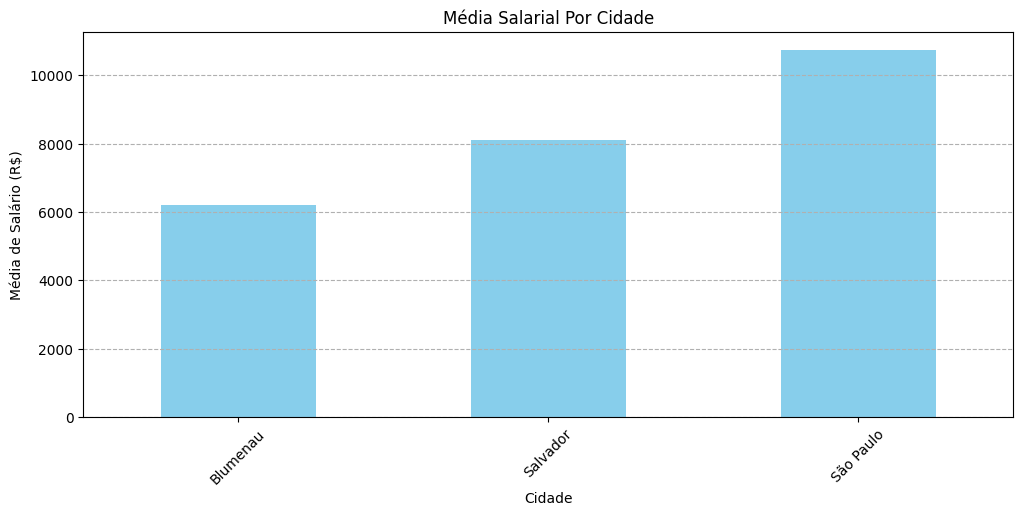

In [103]:
# Gráfico de Barras: Média de Salário por Cidade
media_salario_cidade.plot(kind = 'bar', figsize = (12, 5), color = 'skyblue')

# Adicionando títulos e rótulos
plt.title('Média Salarial Por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Média de Salário (R$)')
plt.xticks(rotation = 45) 
plt.grid(axis = 'y', linestyle = '--')

# Mostra o gráfico
plt.show()

In [104]:
# Contagem de registros (funcionários) por cidade
contagem_cidade = df_dsa['Cidade'].value_counts()

In [105]:
type(contagem_cidade)

pandas.core.series.Series

In [106]:
contagem_cidade

Cidade
São Paulo    3
Blumenau     2
Salvador     1
Name: count, dtype: int64

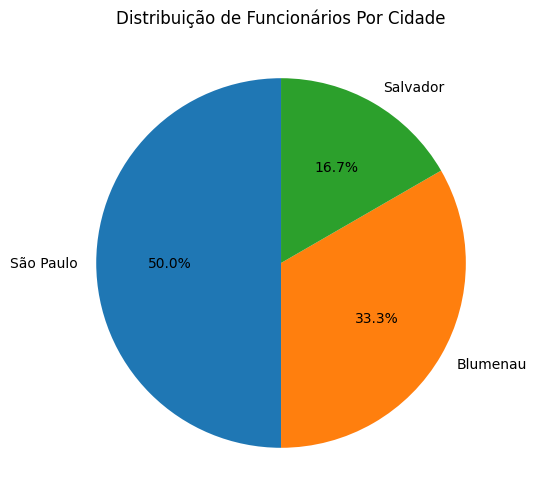

In [107]:
# Gráfico de Pizza: Contagem de funcionários por cidade
contagem_cidade.plot(kind = 'pie', autopct = '%1.1f%%', figsize = (6, 6), startangle = 90)
plt.title('Distribuição de Funcionários Por Cidade')
plt.ylabel('') # Remove o rótulo do eixo y
plt.show()

# Fim

Este curso é inteiramente gratuito e com certificado de conclusão. Se estiver gostando, ajude o trabalho da Data Science Academy e compartilhe nas suas redes. Conte para as pessoas o que estamos fazendo aqui, oferecendo material de alto nível de forma gratuita. Este é o link da página do curso:

https://www.datascienceacademy.com.br/course/fundamentos-de-linguagem-python-do-basico-a-aplicacoes-de-ia